In [17]:
import os
import sys

In [18]:
os.getcwd()

'g:\\My Drive\\2 DATA_SCIENCE_BUSINESS_ANALYTICS\\AI in Enterprise Systems\\Breast Cancer Wisconsin Diagnostic'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [20]:
# Get the name of the columns
column_names = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

In [21]:
# Load the data set
data = pd.read_csv('wdbc.data', names=column_names)
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# Make a EDA to understand the data
data.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
#So far the dsata is clean, no missing values. We have the object column Diagnosis that we need to convert to a numerical value. 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
# Calculate the percentage of each category
diagnosis_counts = data['Diagnosis'].value_counts()
diagnosis_percentages = 100 * diagnosis_counts / len(data)
print(diagnosis_percentages)

Diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


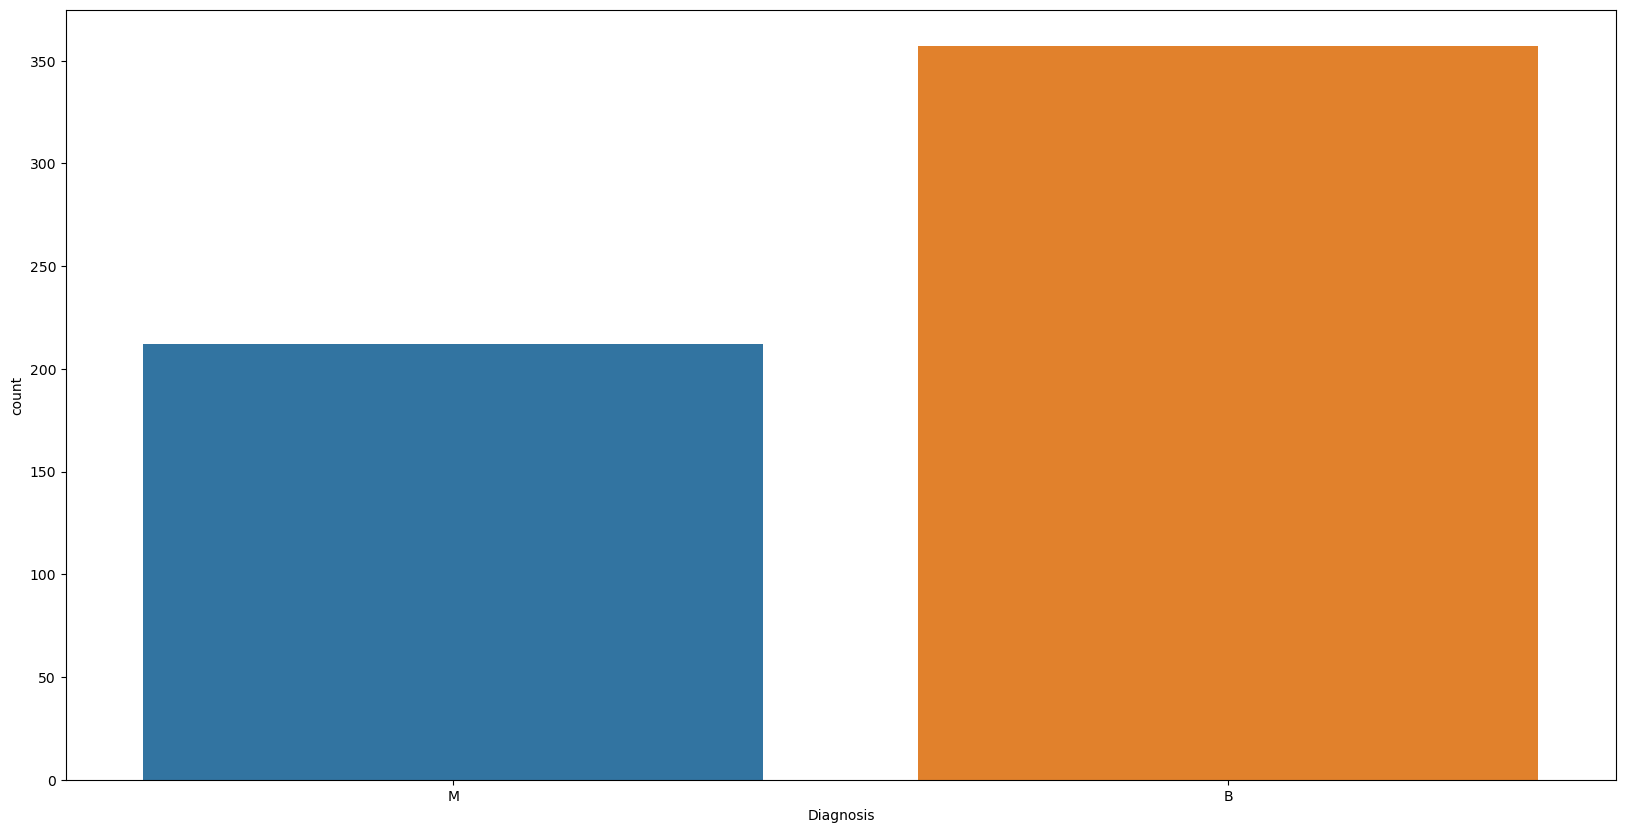

In [25]:
# Let's find out the distribution for the Diagnosis column, and how the variables are correlated
plt.figure(figsize=(20, 10))
sns.countplot(x='Diagnosis', data=data)
plt.show()

In [26]:
# let's see the correlation between the variables, but first we need to convert the Diagnosis column to a numerical value and drop the ID column is not useful for the analysis
data.drop('ID', axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
correlation = data.corr()

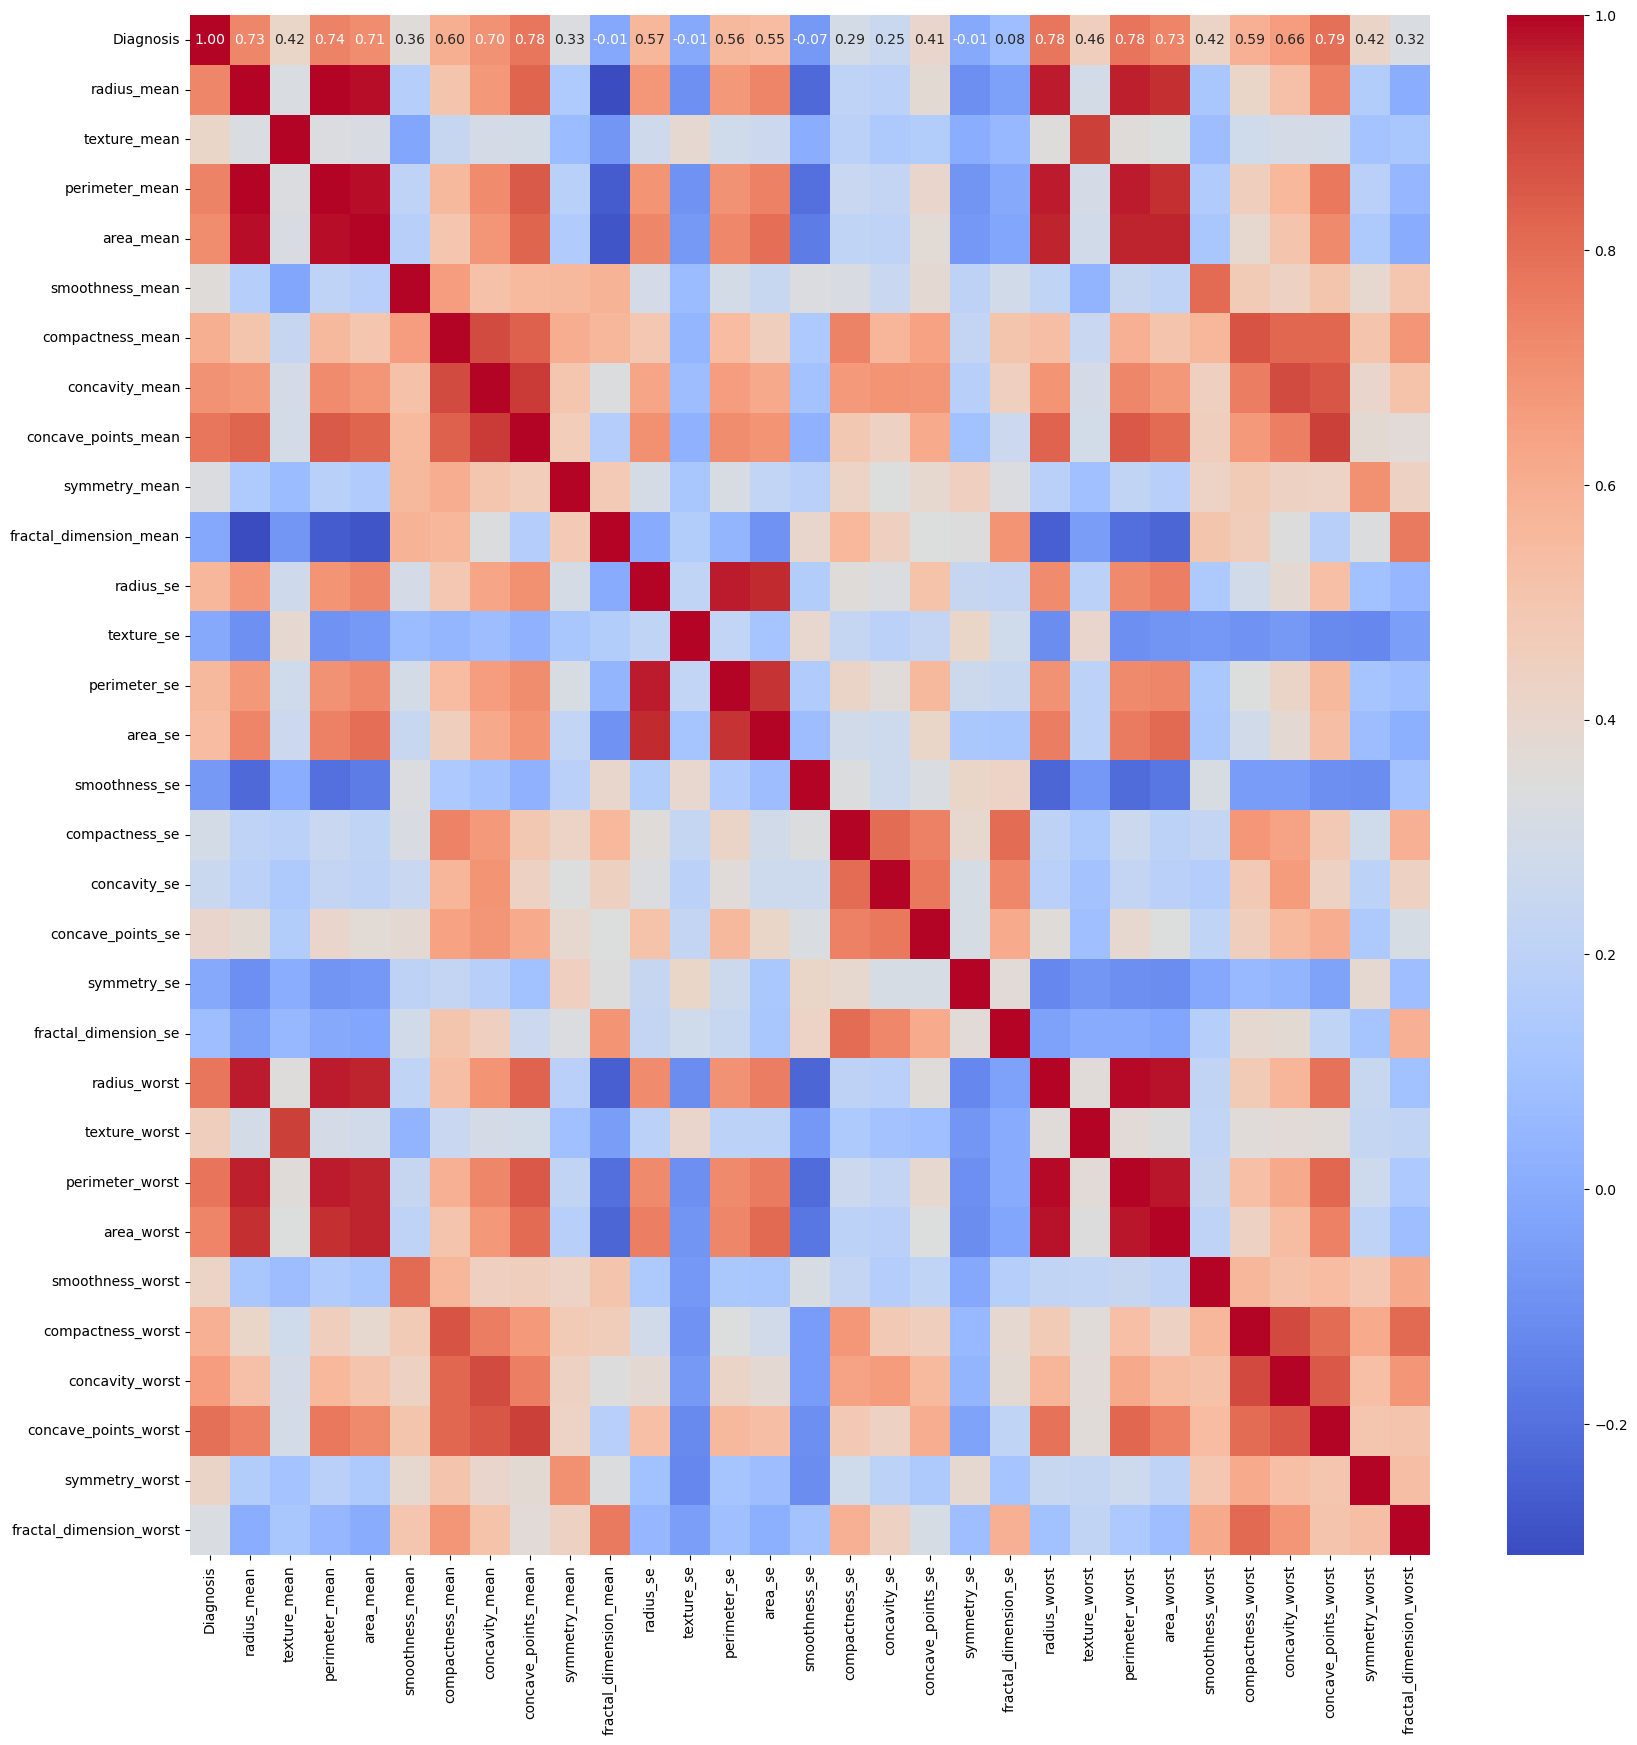

In [27]:
#plot correlation
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Procesing the Data

In [29]:
# We can see that the variables are highly correlated, we can drop some of them to avoid multicollinearity. Lets drop the variables that are equal or greater than 0.9
threshold = 0.9
corr_matrix = data.corr().abs().unstack()
high_corr_pairs = corr_matrix[(corr_matrix >= threshold) & (corr_matrix < 1)].sort_values(ascending=False)
# Create a data frame for high correlated pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Correlation']).reset_index()
high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

In [33]:
# Display the DataFrame
print("Highly Correlated Pairs:")
print(high_corr_df)

Highly Correlated Pairs:
               Feature 1             Feature 2  Correlation
0            radius_mean        perimeter_mean     0.997855
1         perimeter_mean           radius_mean     0.997855
2        perimeter_worst          radius_worst     0.993708
3           radius_worst       perimeter_worst     0.993708
4            radius_mean             area_mean     0.987357
5              area_mean           radius_mean     0.987357
6         perimeter_mean             area_mean     0.986507
7              area_mean        perimeter_mean     0.986507
8             area_worst          radius_worst     0.984015
9           radius_worst            area_worst     0.984015
10            area_worst       perimeter_worst     0.977578
11       perimeter_worst            area_worst     0.977578
12             radius_se          perimeter_se     0.972794
13          perimeter_se             radius_se     0.972794
14        perimeter_mean       perimeter_worst     0.970387
15       perime

In [34]:
# Drop one feature from each pair of highly correlated features
to_drop = set()
for feature1, feature2 in high_corr_df[['Feature 1', 'Feature 2']].values:
    if feature1 not in to_drop:
        to_drop.add(feature2)

data_reduced = data.drop(columns=to_drop)

# Print the remaining features
remaining_features = data_reduced.columns.tolist()
print("Remaining features after dropping highly correlated ones:")
print(remaining_features)

Remaining features after dropping highly correlated ones:
['Diagnosis', 'radius_mean', 'smoothness_mean', 'compactness_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [35]:
# Split the data into features and target variable
X = data_reduced.drop('Diagnosis', axis=1)
y = data_reduced['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=16)

Train the machine model learning

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=16)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Evaluate the model
y_pred = model.predict(X_test)

In [39]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [41]:
# Display the classification report as a DataFrame
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).T

print("Classification Report:")
print(classification_df)


Classification Report:
              precision    recall  f1-score     support
0              0.954128  0.981132  0.967442  106.000000
1              0.967742  0.923077  0.944882   65.000000
accuracy       0.959064  0.959064  0.959064    0.959064
macro avg      0.960935  0.952104  0.956162  171.000000
weighted avg   0.959303  0.959064  0.958866  171.000000


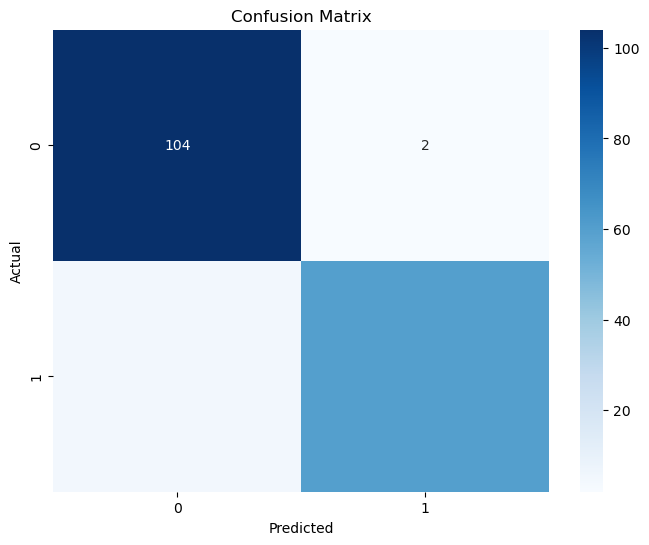

Accuracy: 95.91%


In [42]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Conclusion
The Random Forest Classifier trained on the Breast Cancer Wisconsin (Diagnostic) dataset produced the following results:

Accuracy: The model achieved an accuracy of approximately 95.91%, indicating that it correctly classified about 96% of the instances in the test set.

Precision, Recall, and F1-Score:

Class 0 (Benign):
Precision: 95.41% - This indicates that out of all the instances classified as benign, 95.41% were actually benign.
Recall: 98.11% - This shows that out of all the actual benign instances, 98.11% were correctly classified by the model.
F1-Score: 96.74% - The harmonic mean of precision and recall for class 0.
Class 1 (Malignant):
Precision: 96.77% - This indicates that out of all the instances classified as malignant, 96.77% were actually malignant.
Recall: 92.31% - This shows that out of all the actual malignant instances, 92.31% were correctly classified by the model.
F1-Score: 94.49% - The harmonic mean of precision and recall for class 1.
Macro Average:

Precision: 96.09% - The average precision across both classes.
Recall: 95.21% - The average recall across both classes.
F1-Score: 95.62% - The average F1-score across both classes.
Weighted Average:

Precision: 95.93% - The weighted average precision considering the support of each class.
Recall: 95.91% - The weighted average recall considering the support of each class.
F1-Score: 95.89% - The weighted average F1-score considering the support of each class.
Interpretation
High Accuracy: The model's high accuracy indicates that it performs well in distinguishing between benign and malignant tumors. This high accuracy is crucial for medical diagnostics, where accurate predictions can significantly impact patient outcomes.

Balanced Performance: Both precision and recall are high for both classes, indicating a balanced performance. The model is effective in minimizing both false positives (incorrectly classifying benign tumors as malignant) and false negatives (incorrectly classifying malignant tumors as benign).

Class Distribution: The support values show the number of instances for each class in the test set, which is essential to understand the model's performance across different class distributions.

Recommendations
Further Validation: Although the model shows high performance on the test set, further validation on different datasets and cross-validation techniques can help ensure its robustness and generalizability.

Feature Importance: Investigate the feature importance scores provided by the Random Forest model to understand which features contribute most to the predictions. This insight can be valuable for domain experts in medical diagnostics.

Model Tuning: Consider tuning the hyperparameters of the Random Forest model (e.g., n_estimators, max_depth) to potentially improve performance further.

Deployment: With high accuracy and balanced performance, this model can be considered for deployment in a clinical decision support system, aiding healthcare professionals in diagnosing breast cancer.

Overall, the Random Forest model demonstrates strong predictive performance and could be a valuable tool in the early detection and diagnosis of breast cancer, subject to further validation and testing in real-world scenarios.